<a href="https://colab.research.google.com/github/zehraagol/BTS-Group-Internship/blob/main/MentalArts_CaseStudy_2022_86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBB ACIK VERI ILE TRAFIK YOGUNLUGUNUN GORSELLESTIRILMESI

IBB'nin [Acik Veri Platformu](https://data.ibb.gov.tr/)'nda Istanbul Buyuksehir belediyesine ait cesitli verilere erismek mumkun. Bu USE-CASE'de gorsellestirme ve istatistiksel analiz uzerine calisacagiz. Acik veriler icerisinde bircok veriye ulasmak mumkun. Bu problemde trafik yogunlugu uzerine calisacagiz.[Ocak 2020 Trafik Yogunluk Verisi](https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821) uzerine birtakim incelemeler yapalim.

## Problem Tanimi

Bu problemde Istanbul'u ortalama trafik yogunluguna gore renklendirecegiz. Bunun icin Python'da bulunan `geohash` ve `folium` kutuphanelerini kullanacagiz. Asagidaki ornekte Istanbul'a ait bir bolge "geohash" koduna gore konumu harita uzerinde renklendirilmistir. Geohash kodu bize belirtilen bolgenin merkezi, baslangic-bitis paralelleri ve meridyenleri hakkinda temel bilgi verir. Bu sekilde konumu iceren bolgeyi geohash kodu ile elde etmek mumkun. Ornek kod asagida bulunabilir.

In [ ]:
!pip install python-geohash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-geohash: filename=python_geohash-0.8.5-cp37-cp37m-linux_x86_64.whl size=44803 sha256=a9a8a7050f41b24b89368d5de951a3e4a682ce90f5f672b492d667c04ba7eba6
  Stored in directory: /root/.cache/pip/wheels/ea/62/7a/e8b943f1d8025cd93a93928a162319e56843301c8c06610ffe
Successfully built python-geohash


In [ ]:
# Import Libraries
import geohash
import folium
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
 !wget -O ibb.csv https://data.ibb.gov.tr/datastore/dump/db9c7fb3-e7f9-435a-92f4-1b917e357821?bom=True #basınca direkt indirilen bir link ise bunu wget ile indirebiliriz ve yüzde kaç indiğini de görebiliriz. İndir butonu yerine ters tıkla baglantı adresini kopyala dedim

--2022-08-25 12:28:04--  https://data.ibb.gov.tr/datastore/dump/db9c7fb3-e7f9-435a-92f4-1b917e357821?bom=True
Resolving data.ibb.gov.tr (data.ibb.gov.tr)... 185.68.223.108
Connecting to data.ibb.gov.tr (data.ibb.gov.tr)|185.68.223.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘ibb.csv’

ibb.csv                 [              <=>   ] 101.98M  1.63MB/s    in 63s     

2022-08-25 12:29:07 (1.62 MB/s) - ‘ibb.csv’ saved [106934563]



In [ ]:
df = pd.read_csv("/content/ibb.csv")  # Read the dataset from file.
df.head()  # Examine the dataset by printing few rows.

,_id,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,4,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123


In [ ]:
df.shape

(1328624, 9)

In [ ]:
df.columns

Index(['_id', 'DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES'],
      dtype='object')

In [ ]:
#df["DATE"]=pd.to_datetime(df['DATE_TIME']).dt.date

In [ ]:
#df["TIME"]=pd.to_datetime(df['DATE_TIME']).dt.time

In [ ]:
#df.drop(['DATE_TIME'], axis=1)

In [ ]:
df=df.drop(["_id"], axis=1)

Goruldugu uzere veri setinde zaman, enlem, boylam, herhangi bir aracin minimum hizi, maksimum hizi, ortalama hizi ve arac sayisi var. Bunun disinda bize tum konum bilgisini veren geohash kolonu var. Ornek bir veri noktasini geohash ile harita uzerinde renklendirelim. Ilk veri noktasinin renklendirilmesi asagida gorulebilir.

In [ ]:
decoded = geohash.bbox(df["GEOHASH"][0]) # decode the geohash
lat = df["LATITUDE"][0]
long = df["LONGITUDE"][0]

m = folium.Map(
    location=[lat,long], # set the center location of the map
    zoom_start=15,
    tiles="CartoDB Positron"
)


W = decoded["w"]
E = decoded["e"]
N = decoded["n"]
S = decoded["s"]
# create each point of the rectangle
upper_left = (N, W)
upper_right = (N, E)
lower_right = (S, E)
lower_left = (S, W)
edges = [upper_left, upper_right, lower_right, lower_left]
# create rectangle object and add it to the map canvas
folium.Rectangle(
    bounds=edges,
    color="blue",
    fill_color="red",
    weight=1,
    popup=df["GEOHASH"][0],
).add_to(m)
m # show the map

In [ ]:
df.columns

Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES'],
      dtype='object')

Simdi yapmamiz gereken bu renklendirme isini butun harita icin yapmak. Tabi burada dikkat edilmesi gereken birkac nokta var. Birincisi, ayni bolgeye ait birden fazla entry olabilir. Bunu asagida kontrol edelim.

In [ ]:
# Use a pandas function over GEOHASH to see if there is redundancy in the data. (Tip: You may want to count occurences of a pandas serie -such as location-)

In [ ]:
df[['LONGITUDE', 'LATITUDE']].value_counts()

LONGITUDE  LATITUDE 
28.811646  41.047668    741
29.009399  41.064148    741
28.811646  41.025696    741
28.767700  40.987244    741
28.932495  41.091614    740
                       ... 
29.613647  41.152039      1
28.800659  41.119080      1
29.097290  41.108093      1
29.119263  41.141052      1
28.108521  41.190491      1
Length: 2248, dtype: int64

In [ ]:
df[['GEOHASH']].value_counts()

GEOHASH
sxk3nt     741
sxk9s5     741
sxk3rs     741
sxk3x8     741
sxkc0m     740
          ... 
sx7frd       1
sxkcun       1
sxkfn2       1
sx7fpp       1
sxkcus       1
Length: 2248, dtype: int64

In [ ]:
location_df=df[['LONGITUDE', 'LATITUDE', 'GEOHASH']]

In [ ]:
location_df.duplicated(keep=False).value_counts() #all duplications are named true

True     1328615
False          9
dtype: int64

In [ ]:
a=df[df["GEOHASH"]== "sxk3nt"].sort_values("DATE_TIME")

In [ ]:
a[:24]

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
163799,2020-01-01 00:00:00,28.7677,40.987244,sxk3nt,6,130,63,181
602720,2020-01-01 01:00:00,28.7677,40.987244,sxk3nt,7,118,62,164
1044557,2020-01-01 02:00:00,28.7677,40.987244,sxk3nt,8,119,65,126
527712,2020-01-01 03:00:00,28.7677,40.987244,sxk3nt,7,137,66,97
1126748,2020-01-01 04:00:00,28.7677,40.987244,sxk3nt,10,125,61,53
203245,2020-01-01 05:00:00,28.7677,40.987244,sxk3nt,12,145,60,63
1284754,2020-01-01 06:00:00,28.7677,40.987244,sxk3nt,6,127,61,126
1321645,2020-01-01 07:00:00,28.7677,40.987244,sxk3nt,7,139,55,133
1218430,2020-01-01 08:00:00,28.7677,40.987244,sxk3nt,9,109,53,123
133649,2020-01-01 09:00:00,28.7677,40.987244,sxk3nt,7,117,52,110


[bağlantı metni](https://)Ayni bolgede birden fazla veriye sahip olan bolgelerin ortalamasini alsak fena olmayabilir. Bunun icin bir python fonksiyonu yazalim.

In [ ]:
# Pro tip: if testing over entire dataset is too long, try to pass `df.head()` and test it with a small subset.
def get_non_redundant_geohash_with_average_speed(df: pd.DataFrame):
    non_redundant_geohash_speed = {}   # Create a dictionary
   
    for i in df.iterrows():  # For loop over the dataframe.
      non_redundant_geohash_speed.append(i["AVERAGE_SPEED"]) # For each element, add the average speed to an element of diwctionary. After we sum it up, we will divide it to the number of entries 
            # for that key. Question, which average attribute we want to find? Build your dict accordingly.
            # Use dict.get to create a key with a default if that key does not exist. Then, add it to itself with the current average value.
            # Example: dict = something + dict.get something something. (This expression is not correct of course.)
        if index % 1000
        00 == 0:  # I'll leave this as a progress tracker.
            print("index: ",index)
    for __:  # Loop through the dictionary.
        __  # For each key, find the total from dictionary, and divide it with the number of entries for that key. Figure it out!
    return non_redundant_geohash_speed

In [ ]:
# non_redundant_speed = get_non_redundant_geohash_with_average_speed(df)

Bu islem cok ama cok uzun surmus olabilir. Bu da Python'a dair aslinda alinmasi gereken ilk derslerden bir tanesi: hazir fonksiyon varsa hazir fonksiyon kullanilmali. Donguleri kullanmak Python'daki en yavas islemlerden bir tanesi, fakat hazir fonksiyonlar arka planda farkli islemlerle cok hizlandiriyorlar. Daha fazla bilgi isteyenleri suraya yonlendirebiliriz: [Looping Through DataFrame](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas).

Tabi ki yazdigimiz kod bu kadar yavas calismamali, dolayisiyla daha hizli bir cozum bulmaliyiz. Bunun icin [Google](https://google.com)'a guveniyoruz. Arayip kolay bir cozum bulabiliriz.

Ipucu: arama yaparken pandas data frame uzerine calistiginizi unutmayin. Birden fazla deger olan (duplicates) satirlar icin ortalama (mean) almamiz gerekiyor.

In [ ]:
df_non_redundant = df.groupby('GEOHASH', as_index=False).mean()

In [ ]:

# Print non-redundant average data set.
print(df_non_redundant)

     GEOHASH  LONGITUDE   LATITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  \
0     sx7chk  27.965698  40.981750      59.199541     121.910550   
1     sx7chm  27.965698  40.987244      34.933116     117.004894   
2     sx7cht  27.976685  40.987244       8.558875      90.699473   
3     sx7chw  27.976685  40.992737      29.751174     114.732394   
4     sx7chx  27.976685  40.998230      25.258410     120.981651   
...      ...        ...        ...            ...            ...   
2243  sxm41s  29.602661  41.157532      38.368421      98.315789   
2244  sxm41u  29.613647  41.157532      27.909091      88.909091   
2245  sxm445  29.624634  41.152039      56.500000     105.000000   
2246  sxm44h  29.624634  41.157532      24.500000      91.000000   
2247  sxm44k  29.635620  41.157532      23.000000      91.500000   

      AVERAGE_SPEED  NUMBER_OF_VEHICLES  
0         86.178899           15.889908  
1         76.168026           23.424144  
2         41.755712           20.644991  
3         70.96

Artik elimizde non-redundant bir veri olduguna gore bunlarin ortalamalarina gore bir gorsellestirme yapabiliriz. Bunun icin belirlememiz gereken parametreler var. Ornegin ortalama hiz icin hangi aralikta hangi renklendirmeyi yapacagiz, Geohash koordinatlari nereye tekabul ediyor, haritayi ne kadar yakinlikta gormek istiyoruz gibi.

#### Harita renklendirmesi

Renklendirme ile baslayalim. Haritanin guzel gorunmesi icin farkli hiz araliklarina farkli renkler atayalim. Bunu anlamak icin ise verinin dagilimini histogram olarak goruntuleyelim.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedaa1a2bd0>,
      dtype=object)

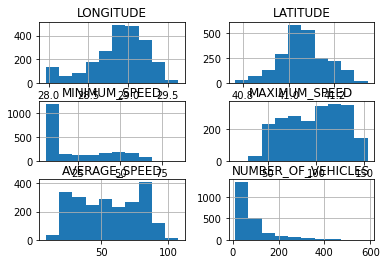

In [ ]:
# Use plt.hist to visualize average speed on non-redundant data.
df_non_redundant.hist() 

Goruldugu gibi veri 0 ile 100 civarinda gidip geliyor. Minimum ve maksimum degerlerini bulalim.

In [ ]:
# Use pandas functions to obtain minimum and maximum of average speed. Then obtain the bin sizes with some calculation, we need 5 bins.
max_speed = df_non_redundant["AVERAGE_SPEED"].max()
min_speed = df_non_redundant["AVERAGE_SPEED"].min()
bin_size = (max_speed-min_speed)/5

In [ ]:
bin_size=round(bin_size)

In [ ]:
# Print max_speed, min_speed and bin_size
print(" max speed is {}\n min speed is {}\n bin size is {}".format(max_speed,min_speed,bin_size))

 max speed is 107.5062656641604
 min speed is 9.0
 bin size is 20


Minimum ve maksimum hiz degerleri arasinda belirli araliklar icin belirli renkler belirleyelim. Yazdigimiz fonksiyon hiz degerini alsin ve rengi donsun. Ona gore haritamizi renklendirebilecegiz. 5 renge bolelim araligi. Bu kisimlar dinamik hale getirilebilir fakat simdilik kolay ilerlemek adina statik yapacagiz.

In [ ]:
def determine_color(speed, max_speed, min_speed):
    
    max_speed = df_non_redundant["AVERAGE_SPEED"].max()
    min_speed = df_non_redundant["AVERAGE_SPEED"].min()
    bin_size = round((max_speed-min_speed)/5)

    if speed>= min_speed and speed<= min_speed+bin_size:
      return "red"
      
      
    elif speed> min_speed+bin_size and speed<= min_speed+2*bin_size:
      return "dark_blue"


    elif speed> min_speed+2*bin_size and speed<= min_speed+ 3*bin_size: 
      return "blue"

    elif speed> min_speed+ 3*bin_size and speed<= min_speed+ 4*bin_size:
      return "light_blue"

    elif speed> min_speed+4*bin_size and speed<= max_speed:
      return "green"

    else :
      return "gray"
         
    # For first bin, red.
    # Second bin, darkblue
    # Third bin, blue
    # Fourth bin, lightblue
    # Fifth bin, green
    # Else print gray
    # Return the string of the color.


Simdi isin eglenceli kismina geldik. Bir fonksiyon yazacagiz ve butun Istanbul'u ortalama hizlarina gore renklendirecegiz. Bunun icin non-redundant veri seti uzerinde konum geldikce haritaya ekleyecegiz. Harita renklendirme fonksiyonunu asagida yazalim. Bunun icin yukarida verdigimiz statik ornegi bir fonksiyon icerisine disaridan parametre alacak sekilde degistirmemiz gerekiyor. Devaminda bize haritanin objesini return etmeli. Son olarak da ekranda gosterecegiz.

min_speed, max_speed disaridan parametre olarak da verilebilir. Tercih meselesi. Butun haritayi print eden fonksiyon yerine haritaya "tek" data pointi ekleyen bir fonksiyon yazilip disaridan butun veri noktalari icin de cagrilabilir. Bunlar gelistirme konusunda tercih meselesi, fikir olmasi acisindan bahsediyorum. Bizim ornegimizde data frame'in tamamini alip `map` objesine ekleyecegiz. Dilerseniz oteki turlu de yapabilirsiniz.

In [ ]:

def visualize_istanbul(df: pd.DataFrame, m: folium.Map, g: geohash):

    max_speed = df_non_redundant["AVERAGE_SPEED"].max()  # For colors
    min_speed = df_non_redundant["AVERAGE_SPEED"].min()  # For colors

    for i in df_non_redundant.iterrows() :# For each row of dataframe   
      
      
      decoded = geohash.bbox(i[1]["GEOHASH"]) # decode the geohash
      lat = i[1]["LATITUDE"]
      long = i[1]["LONGITUDE"]

      W = decoded["w"]
      E = decoded["e"]
      N = decoded["n"]
      S = decoded["s"]
      # create each point of the rectangle
      upper_left = (N, W)
      upper_right = (N, E)
      lower_right = (S, E)
      lower_left = (S, W)
      edges = [upper_left, upper_right, lower_right, lower_left]
      # create rectangle object and add it to the map canvas
      folium.Rectangle(
          bounds=edges,
          color="blue",
          fill_color = determine_color(i[1]["AVERAGE_SPEED"], max_speed, min_speed),
          weight=1,
          popup=i[1]["AVERAGE_SPEED"],
      ).add_to(m)

      

       # Determine the color
      # create rectangle object and add it to the map canvas. Don't forget colors.

    return m 
    

In [ ]:
istanbul_latitude = 41.015137    #  the latitude of Istanbul
istanbul_longitude = 28.979530   #  the longitude of Istanbul
zoom_start = 15  # Manually tweak the zoom parameter to see Istanbul
m = folium.Map(
            location=[istanbul_latitude,istanbul_longitude], # set the center location of the map
            zoom_start=zoom_start,
            tiles="CartoDB Positron"
        )


visualize_istanbul(df_non_redundant, m, geohash)